In [125]:
import numpy as np
import pandas as pd # Data Frames not (yet) useful for this project.
import matplotlib
#matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import csv

#import keras
import sklearn as sk

In [2]:
# # Create a test and training set, once.
# # LATER ON: USE scikitlearn's "split data" functions!
# import random

# with open('training_data.txt') as f:
#     headerline = f.readline()
#     points = f.readlines()
# f.close()

# N = len(points)
# N_train = int(N * 0.8)
# print(N, N_train)

# random.seed(888)
# random.shuffle(points) # Shuffles iterable in place

# with open('data_train.txt', 'w') as TRAIN:
#     TRAIN.write(headerline)
#     for i in range(0, N_train):
#         TRAIN.write(points[i])
# TRAIN.close()

# with open('data_test.txt', 'w') as TEST:
#     TEST.write(headerline)
#     for i in range(N_train, N):
#         TEST.write(points[i])
# TEST.close()

# data_labeled = np.loadtxt('./training_data.txt', skiprows=1) #pd.read_csv('./training_data.txt')
# print(data_labeled.shape)

# with open('training_data.txt') as f:
#     headerline = f.readline()
# f.close()
    
# # N, D1 = data_labeled.shape

# # np.random.seed(888)
# # # np.random.shuffle only shuffles along first dimension, as we desired.
# # data_labeled_shuffle = np.random.shuffle(data_labeled)

# # N_train = int(N * 0.8)

# # data_train = data_labeled[0:N_train, :]
# # data_test = data_labeled[N_train:, :]

# # print(data_train.shape)
# # print(data_test.shape)

# # np.savetxt('data_train.txt', data_train, delimiter=' ', header=headerline)
# # np.savetxt('data_test.txt', data_test, delimiter=' ', header=headerline)

In [3]:
data_train = np.loadtxt('./data_train.txt', skiprows=1)
data_test = np.loadtxt('./data_test.txt', skiprows=1)

In [58]:
Y = data_train[:, 0]
X = data_train[:, 1:]

Y_test = data_test[:, 0]
X_test = data_test[:, 1:]

print(Y.shape)
print(X.shape)

N, D = X.shape

with open('training_data.txt') as f:
    reader = csv.reader(f, delimiter=" ")
    labels = next(reader)
labels = labels[1:]

(16000,)
(16000, 1000)


In [32]:
# Following the example code here:
#http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html
from sklearn import decomposition

pca_unnorm = decomposition.PCA(n_components=5)
pca_unnorm.fit(X)
X_pca_unnorm = pca_unnorm.transform(X)

In [33]:
print(X_pca_unnorm.shape)
X_pca_unnorm[0:5, 0:5]

(16000, 5)


array([[-1.98151054, -0.99555394, -0.04558799,  0.21683218, -0.46736732],
       [ 0.335567  , -0.50823199, -0.80540147,  0.12664069, -0.14278082],
       [-1.11568807, -0.12112951, -0.41951128,  0.11356485,  0.42000582],
       [-2.01971228, -0.92933723, -0.06369464,  0.08513448, -0.10884682],
       [-1.43936968, -0.44883516, -0.50199689,  0.05953319, -0.79164976]])

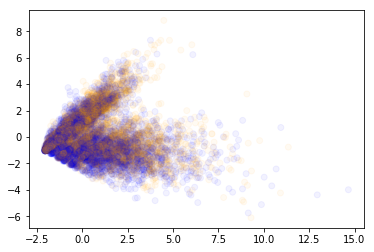

In [53]:
comp1 = 0
comp2 = 1

palette = ['orange', 'blue']
plt.scatter(X_pca_unnorm[:, comp1], X_pca_unnorm[:, comp2], c=[palette[int(i)] for i in Y], alpha=0.05)
plt.show()

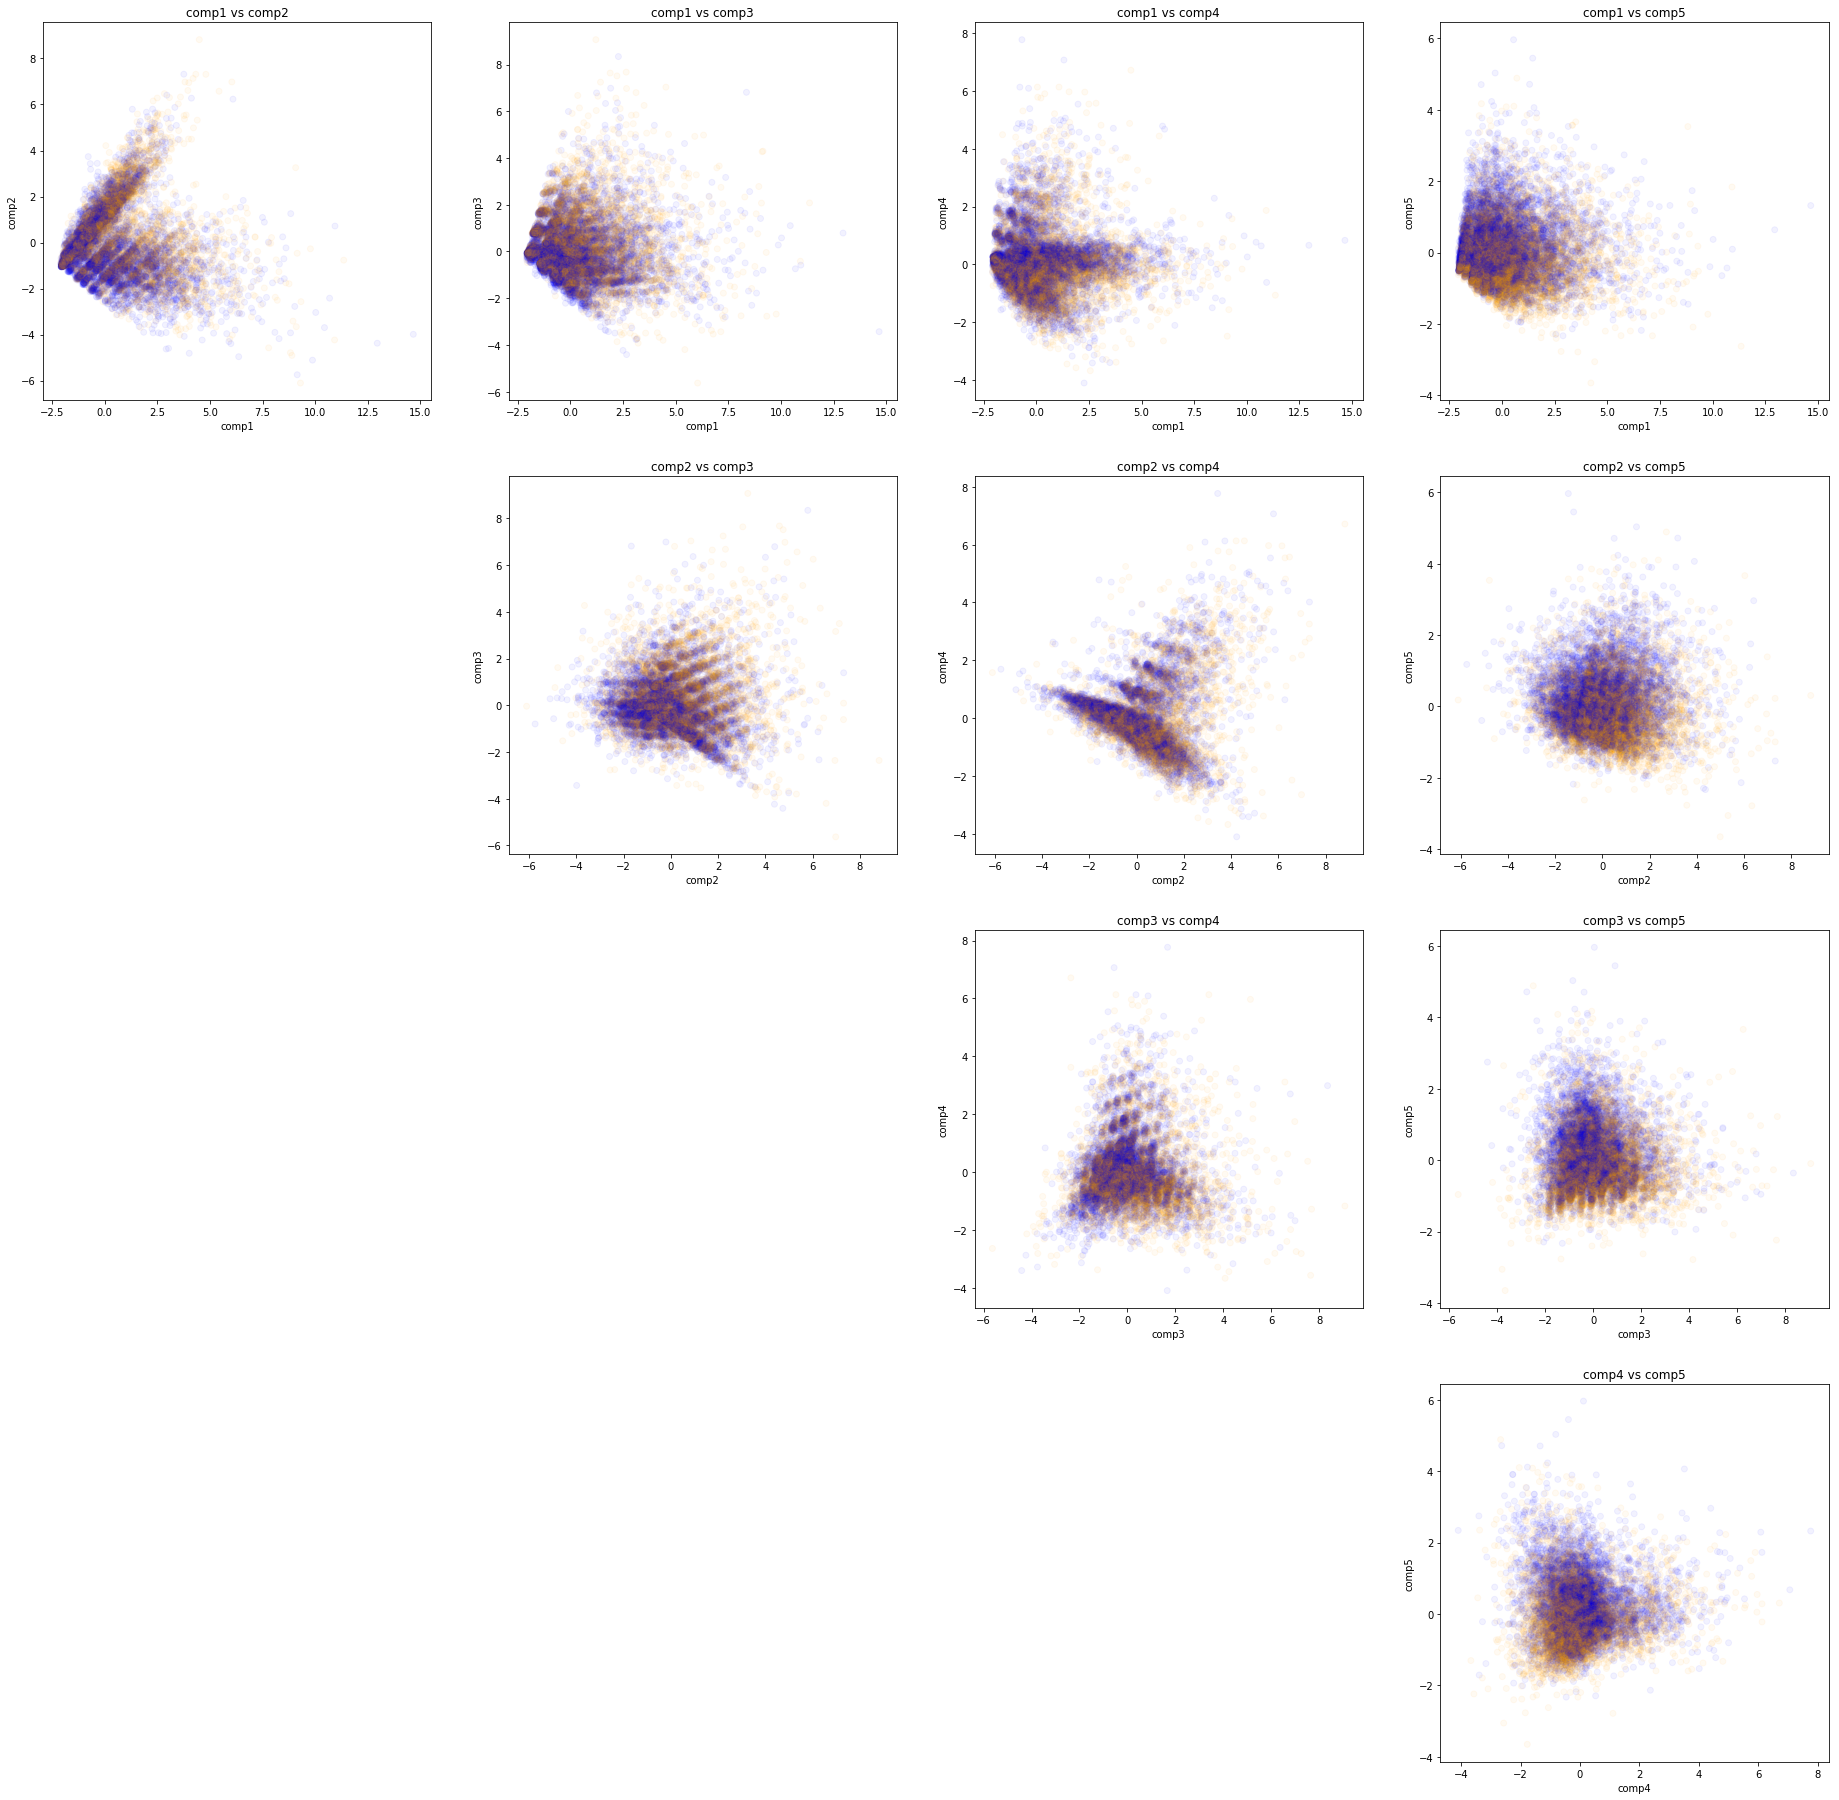

In [78]:
plt.figure(figsize=(32,32))

palette = ['orange', 'blue']

for comp1 in range(ncomp-1):
    for comp2 in range(comp1+1, ncomp):
        plt.subplot(ncomp-1, ncomp-1, (ncomp-1)*comp1+comp2)
        plt.scatter(X_pca_unnorm[:, comp1], X_pca_unnorm[:, comp2], c=[palette[int(i)] for i in Y], alpha=0.05)
        plt.title('comp{0} vs comp{1}'.format(comp1+1, comp2+1))
        plt.xlabel('comp{0}'.format(comp1+1))
        plt.ylabel('comp{0}'.format(comp2+1))
plt.show()

In [43]:
wordsums = np.sum(X, axis=0)

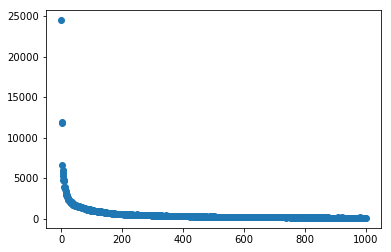

In [46]:
plt.scatter(range(1000), wordsums)

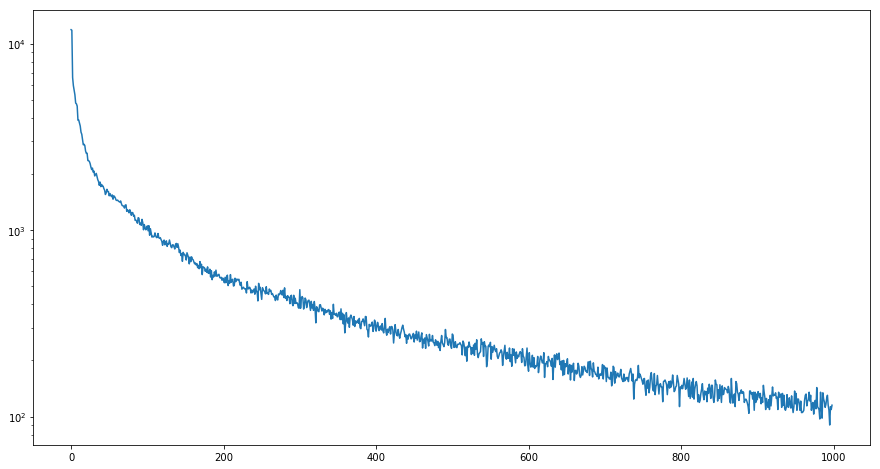

In [65]:
plt.figure(figsize=(15, 8))
plt.semilogy(range(1000-1), wordsums[1:])

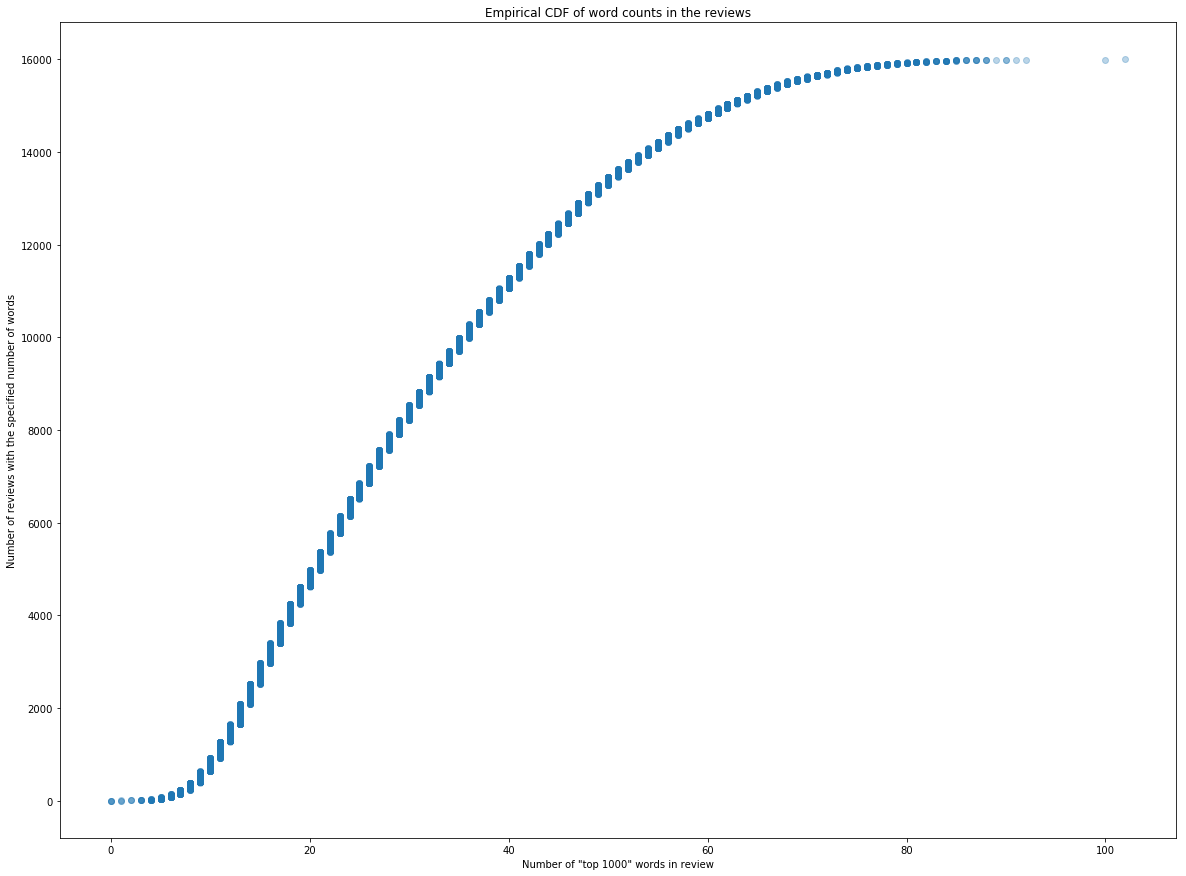

In [63]:
points_nwords = np.sum(X, axis=1)
plt.figure(figsize=(20, 15))
plt.scatter(sorted(points_nwords), range(N), alpha=0.3)
plt.title('Empirical CDF of word counts in the reviews')
plt.xlabel('Number of "top 1000" words in review')
plt.ylabel('Number of reviews with the specified number of words')
plt.show()

In [60]:
# See the plot of which words appear the most (wordsums)

X_stand = X / wordsums

In [69]:
ncomp = 5
pca_stand = decomposition.PCA(n_components=ncomp)
pca_stand.fit(X_stand)
X_pca_stand = pca_stand.transform(X_stand)

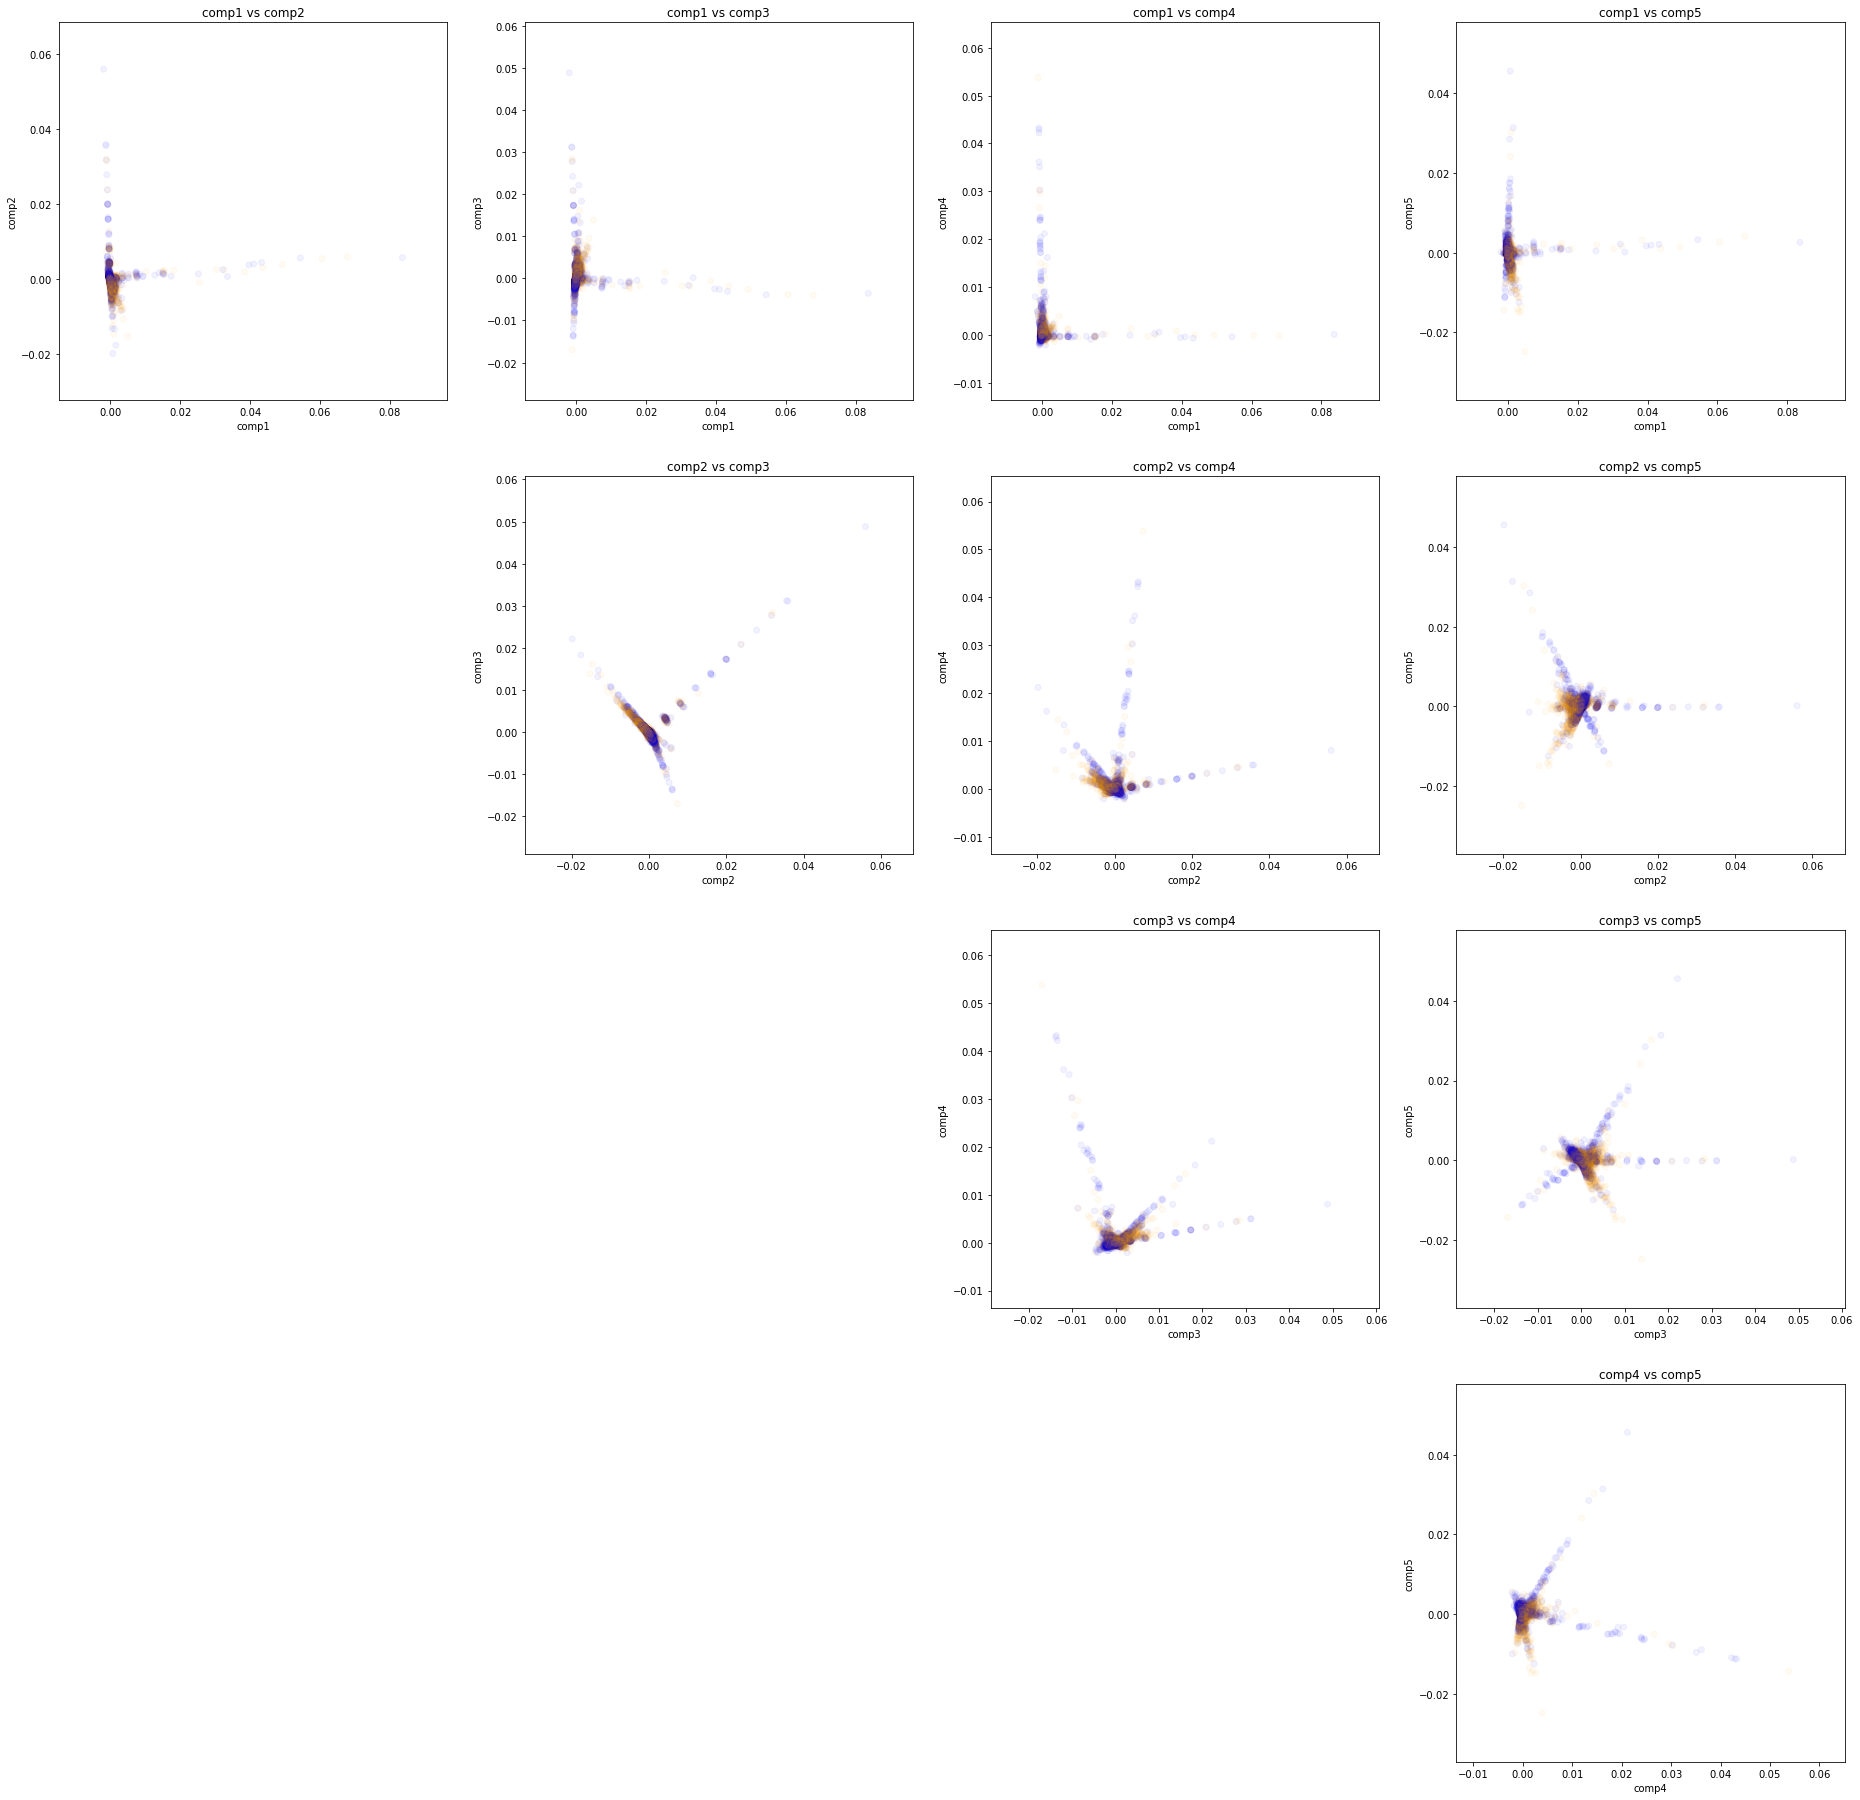

In [77]:
plt.figure(figsize=(32,32))

palette = ['orange', 'blue']

for comp1 in range(ncomp-1):
    for comp2 in range(comp1+1, ncomp):
        plt.subplot(ncomp-1, ncomp-1, (ncomp-1)*comp1+comp2)
        plt.scatter(X_pca_stand[:, comp1], X_pca_stand[:, comp2], c=[palette[int(i)] for i in Y], alpha=0.05)
        plt.title('comp{0} vs comp{1}'.format(comp1+1, comp2+1))
        plt.xlabel('comp{0}'.format(comp1+1))
        plt.ylabel('comp{0}'.format(comp2+1))
plt.show()

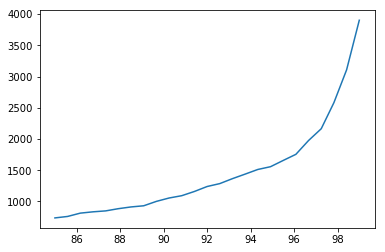

In [94]:
# I'm going to try logistic regression with the numerous words taken out, no normalization,
# and L1 regularization
from sklearn.linear_model import LogisticRegression

npercentiles = 25
percentiles = np.linspace(85, 99, npercentiles)
wordPercentiles = np.zeros(npercentiles)
for i, p in enumerate(percentiles):
    wordPercentiles[i] = np.percentile(wordsums, p)

plt.plot(percentiles, wordPercentiles)

In [95]:
commonCutoff = np.percentile(wordsums, 97)
print(commonCutoff)
commonWords = wordsums >= commonCutoff
print(sum(commonWords))
X_noCommon = X[:, np.logical_not(commonWords)]
print(X_noCommon.shape)

2073.2
30
(16000, 970)


In [184]:
Cs = [10**(i) for i in range(-9, 9)] # C must be > 0.

my_logistics = []
for c in Cs:
    model = LogisticRegression(penalty='l1', C=c)
    model.fit(X, Y)
    my_logistics.append(model)

In [185]:
E_valids = []
for model in my_logistics:
    pred = model.predict(X_test)
    E_valid = np.sum(np.logical_not(np.equal(Y_test, pred)))
    E_valids.append(E_valid)

In [188]:
E_valids = np.array(E_valids)
accuracy = 1 - (E_valids / len(Y_test))
print(accuracy)

[ 0.49     0.49     0.49     0.49     0.49     0.49     0.59425  0.7825
  0.8365   0.839    0.83875  0.83775  0.83775  0.83775  0.83775  0.83775
  0.83775  0.83775]


In [189]:
c_best_i = np.argmax(accuracy)
c_best = Cs[c_best_i]
print(c_best_i, c_best, accuracy[c_best_i])
print(Cs[c_best_i-1], Cs[c_best_i+1])

9 1 0.839
0.1 10


In [190]:
Cs = np.linspace(0.1, 10, 40) # C must be > 0.

my_logistics = []
for c in Cs:
    model = LogisticRegression(penalty='l1', C=c)
    model.fit(X, Y)
    my_logistics.append(model)

In [191]:
E_valids = []
for model in my_logistics:
    pred = model.predict(X_test)
    E_valid = np.sum(np.logical_not(np.equal(Y_test, pred)))
    E_valids.append(E_valid)
E_valids = np.array(E_valids)
accuracy = 1 - (E_valids / len(Y_test))

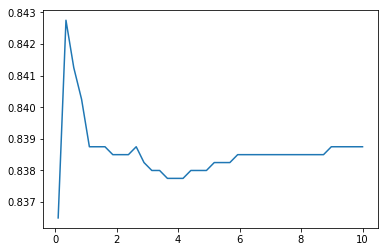

In [192]:
plt.plot(Cs, accuracy)

In [193]:
print(np.argmax(accuracy))
print(Cs[np.argmax(accuracy)])
print(Cs[np.argmax(accuracy)-1], Cs[np.argmax(accuracy)+1])

1
0.353846153846
0.1 0.607692307692


31 0.363265306122 0.84325
0.361224489796 0.365306122449


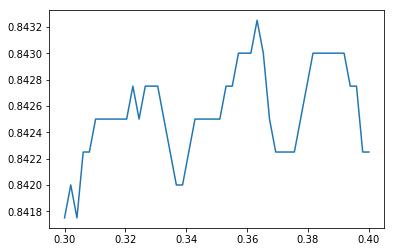

In [195]:
Cs = np.linspace(0.3, 0.4, 50) # C must be > 0.

my_logistics = []
for c in Cs:
    model = LogisticRegression(penalty='l1', C=c)
    model.fit(X, Y)
    my_logistics.append(model)

E_valids = []
for model in my_logistics:
    pred = model.predict(X_test)
    E_valid = np.sum(np.logical_not(np.equal(Y_test, pred)))
    E_valids.append(E_valid)
E_valids = np.array(E_valids)
accuracy = 1 - (E_valids / len(Y_test))

plt.plot(Cs, accuracy)

c_best_i = np.argmax(accuracy)
c_best = Cs[c_best_i]
print(c_best_i, c_best, accuracy[c_best_i])
print(Cs[c_best_i-1], Cs[c_best_i+1])

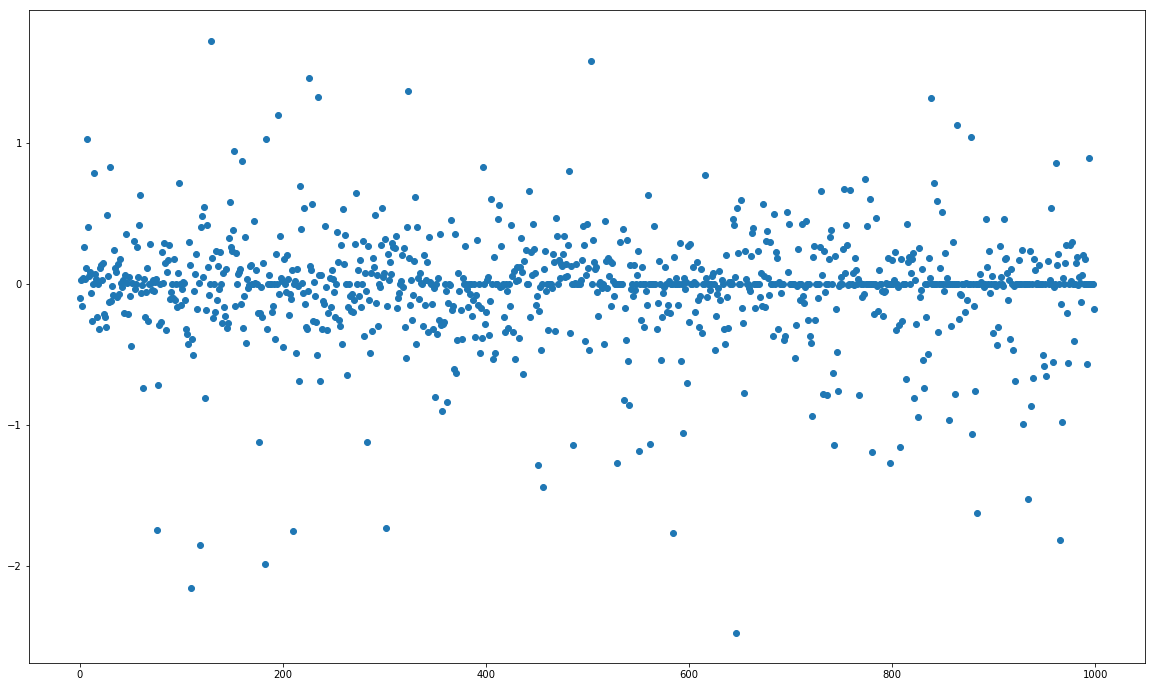

In [121]:
ws = my_logistics[8].coef_
plt.figure(figsize=(20, 12))
plt.scatter(range(D), ws)

In [181]:
print(np.sum(np.equal(ws, 0)))
print(np.sum(np.equal(my_logistics[7].coef_, 0)))
print(np.sum(np.equal(my_logistics[9].coef_, 0)))

214
226
199


In [138]:
#all(np.equal(ws[0], ws.flatten())) #True
labelweights_logistic = pd.DataFrame({"labels":labels,
                                      "weights":ws.flatten()})
labelweights_logistic.head()

labels   weights
0    thi -0.098705
1   book  0.028313
2     wa -0.157701
3    one  0.041958
4   read  0.256316

In [141]:
labelweights_logistic_sort = labelweights_logistic.sort_values(by="weights")
labelweights_logistic_sort.head()

labels   weights
646  poorli -2.472897
110    wast -2.158456
182   worst -1.984232
118    bore -1.853090
965  refund -1.813975

In [142]:
labelweights_logistic_sort.tail()

labels   weights
235   highli  1.320987
323   awesom  1.366738
226  perfect  1.456701
503  fantast  1.575537
129    excel  1.721476

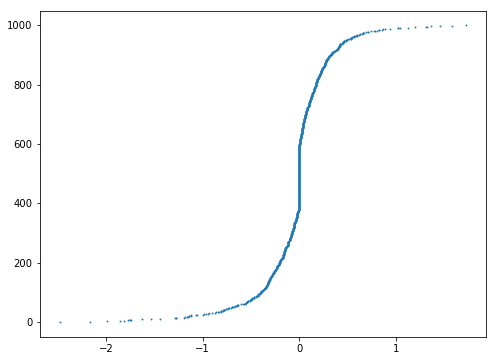

In [174]:
plt.figure(figsize=(8, 6))
plt.scatter(labelweights_logistic_sort.weights, range(D), s=0.75)

In [171]:
labelweights_logistic_sort.iloc[800:810, ]

labels   weights
93      everi  0.172814
911    combin  0.173535
940     defin  0.175606
738     vocal  0.175670
40        way  0.176499
820    involv  0.176910
990   brought  0.177667
809    bluray  0.177932
912      rang  0.178276
520  greatest  0.178536

In [175]:
labelweights_logistic[labelweights_logistic['labels'] == 'room']

labels   weights
645   room  0.043536

In [176]:
labelweights_logistic_sort.iloc[200:210, :]

labels   weights
400      type -0.203504
189       act -0.202067
133      page -0.201450
269      care -0.200262
578       low -0.200200
606   content -0.199403
872   dialogu -0.198340
786      hero -0.196450
267  children -0.195302
452      told -0.193253

In [178]:
labelweights_logistic_sort.iloc[30:50, ]

labels   weights
357      lack -0.899285
937     stuck -0.867569
541     sorri -0.862137
362        ok -0.839647
536   attempt -0.827199
822     claim -0.814074
123      noth -0.807846
350      left -0.805648
767    normal -0.791791
736      okay -0.791365
732     avoid -0.781737
862     shame -0.781547
654      sell -0.774116
882     bewar -0.762048
747     broke -0.758873
831  frustrat -0.741099
62        bad -0.739529
77      money -0.721184
598    perhap -0.701083
237      mayb -0.692764

In [179]:
labelweights_logistic_sort.iloc[900:950, ]

labels   weights
147       nice  0.324610
739     romanc  0.328691
163      alway  0.328952
344      truli  0.330804
197      learn  0.336491
477        ask  0.338263
311      night  0.339834
470      extra  0.340989
261     includ  0.342482
46        also  0.351375
370      store  0.353053
355      youll  0.354546
662         30  0.357513
253    histori  0.365075
677     season  0.372215
740      truth  0.377600
151      world  0.377845
535       beat  0.388252
218     action  0.388482
663     hobbit  0.394813
332       gift  0.399941
322      becom  0.400814
8         good  0.401783
119       help  0.404296
775       soul  0.405701
496     incred  0.406239
566    practic  0.407771
242      funni  0.411906
58   recommend  0.412139
425        add  0.413815
644       plan  0.416119
755     father  0.416702
125       keep  0.418638
446     import  0.419274
815     fascin  0.420256
698       shoe  0.421878
500    possibl  0.422787
711     condit  0.424778
172        bit  0.441611
517       glad  0.443171
715      quick  0.444323
366      today  0.453208
412      simpl  0.454681
892      sweet  0.456932
643       grow  0.458119
910    portray  0.460262
784     batman  0.465452
469       cool  0.466090
120       must  0.482962
27        well  0.484471